📦 Imports and Setup

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import Ridge, ElasticNet
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/engage-2-value-from-clicks-to-conversions/sample_submission.csv
/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv
/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv


📂 Load Dataset

In [2]:
test_data = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv") 
train_data = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv")


**Examining the data by its shape, dtypes and statistics.**

In [3]:
test_data.head()

,userChannel,date,browser,device.browserSize,device.browserVersion,deviceType,device.flashVersion,device.isMobile,device.language,device.mobileDeviceBranding,...,trafficSource,sessionId,sessionNumber,sessionStart,userId,locationZone,geoCluster,browserMajor,screenSize,gclIdPresent
0,Social,20170508,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,...,groups.google.com,1494262567,2,1494262567,59555,8,Region_2,not available in demo dataset,medium,0
1,Organic Search,20170405,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,...,google,1491433811,1,1491433811,6394,8,Region_1,not available in demo dataset,medium,0
2,Organic Search,20170308,Safari,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,...,google,1489001815,1,1489001815,38969,8,Region_5,not available in demo dataset,medium,0
3,Referral,20171113,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,...,docs.google.com,1510593024,30,1510593024,120027,8,Region_2,not available in demo dataset,medium,0
4,Organic Search,20161212,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,...,(direct),1481559809,1,1481559809,69453,8,Region_3,not available in demo dataset,medium,0


In [4]:
train_data.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,trafficSource.isTrueDirect,purchaseValue,browser,device.screenResolution,trafficSource.adContent,trafficSource.keyword,screenSize,geoCluster,trafficSource.adwordsClickInfo.slot,device.mobileDeviceBranding,...,device.language,deviceType,userChannel,device.browserVersion,totalHits,device.screenColors,sessionStart,geoNetwork.continent,device.isMobile,new_visits
0,NaN,0.0,Edge,not available in demo dataset,NaN,NaN,medium,Region_2,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1500100799,Americas,False,1.0
1,True,0.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Direct,not available in demo dataset,1,not available in demo dataset,1495262065,Americas,False,1.0
2,True,0.0,Chrome,not available in demo dataset,NaN,(not provided),medium,Region_2,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Organic Search,not available in demo dataset,6,not available in demo dataset,1508510328,Europe,False,NaN
3,NaN,0.0,Internet Explorer,not available in demo dataset,NaN,NaN,medium,Region_4,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1483431838,Asia,False,1.0
4,True,88950000.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Direct,not available in demo dataset,66,not available in demo dataset,1475804633,Americas,False,1.0


In [5]:
train_data['purchaseValue'].value_counts()

purchaseValue
0.0            92038
16990000.0       445
18990000.0       328
33590000.0       308
19990000.0       288
               ...  
23860000.0         1
16020000.0         1
253930000.0        1
26250000.0         1
169750000.0        1
Name: count, Length: 6766, dtype: int64

In [6]:
train_data['purchaseValue'].skew()

53.90790631995238

key insights: Target variable purchaseValue is highly right-skewed with many 0s.

In [7]:
test_data.shape

(29006, 51)

In [8]:

train_data.shape

(116023, 52)

In [9]:
train_data.describe()

,purchaseValue,userId,gclIdPresent,sessionNumber,totals.visits,sessionId,trafficSource.adwordsClickInfo.page,pageViews,locationZone,totals.bounces,date,totalHits,sessionStart,new_visits
count,1.160230e+05,116023.000000,116023.000000,116023.000000,116023.0,1.160230e+05,4281.000000,116015.000000,116023.0,47148.0,1.160230e+05,116023.000000,1.160230e+05,80518.0
mean,2.656393e+07,61094.356231,0.037019,2.691311,1.0,1.493429e+09,1.019622,8.412352,8.0,1.0,2.016860e+07,10.607371,1.493429e+09,1.0
std,2.051825e+08,35240.756859,0.188808,10.451613,0.0,1.528798e+07,0.174517,14.344937,0.0,0.0,6.182322e+03,19.629576,1.528798e+07,0.0
min,0.000000e+00,0.000000,0.000000,1.000000,1.0,1.470035e+09,1.000000,1.000000,8.0,1.0,2.016080e+07,1.000000,1.470035e+09,1.0
25%,0.000000e+00,30603.500000,0.000000,1.000000,1.0,1.480066e+09,1.000000,1.000000,8.0,1.0,2.016112e+07,1.000000,1.480066e+09,1.0
50%,0.000000e+00,61014.000000,0.000000,1.000000,1.0,1.491646e+09,1.000000,2.000000,8.0,1.0,2.017041e+07,2.000000,1.491646e+09,1.0
75%,0.000000e+00,91616.500000,0.000000,2.000000,1.0,1.505079e+09,1.000000,10.000000,8.0,1.0,2.017091e+07,12.000000,1.505079e+09,1.0
max,2.312950e+10,122276.000000,1.000000,447.000000,1.0,1.525157e+09,5.000000,469.000000,8.0,1.0,2.018043e+07,500.000000,1.525157e+09,1.0


In [10]:
test_data.describe()

,date,totals.bounces,totalHits,new_visits,pageViews,totals.visits,trafficSource.adwordsClickInfo.page,sessionId,sessionNumber,sessionStart,userId,locationZone,gclIdPresent
count,2.900600e+04,11732.0,29006.000000,20094.0,29003.000000,29006.0,1107.000000,2.900600e+04,29006.000000,2.900600e+04,29006.000000,29006.0,29006.000000
mean,2.016855e+07,1.0,10.659519,1.0,8.470813,1.0,1.015357,1.493320e+09,2.595980,1.493320e+09,61327.854134,8.0,0.038268
std,6.200443e+03,0.0,19.771218,0.0,14.561705,0.0,0.177227,1.532493e+07,9.333323,1.532493e+07,35253.344987,0.0,0.191846
min,2.016080e+07,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.470035e+09,1.000000,1.470035e+09,8.000000,8.0,0.000000
25%,2.016112e+07,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.479931e+09,1.000000,1.479931e+09,31006.500000,8.0,0.000000
50%,2.017041e+07,1.0,2.000000,1.0,2.000000,1.0,1.000000,1.491492e+09,1.000000,1.491492e+09,61430.500000,8.0,0.000000
75%,2.017091e+07,1.0,12.000000,1.0,10.000000,1.0,1.000000,1.505148e+09,2.000000,1.505148e+09,91866.250000,8.0,0.000000
max,2.018043e+07,1.0,500.000000,1.0,466.000000,1.0,5.000000,1.525152e+09,334.000000,1.525152e+09,122268.000000,8.0,1.000000


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116023 entries, 0 to 116022
Data columns (total 52 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   trafficSource.isTrueDirect                    42890 non-null   object 
 1   purchaseValue                                 116023 non-null  float64
 2   browser                                       116023 non-null  object 
 3   device.screenResolution                       116023 non-null  object 
 4   trafficSource.adContent                       2963 non-null    object 
 5   trafficSource.keyword                         44162 non-null   object 
 6   screenSize                                    116023 non-null  object 
 7   geoCluster                                    116023 non-null  object 
 8   trafficSource.adwordsClickInfo.slot           4281 non-null    object 
 9   device.mobileDeviceBranding                   11

In [12]:
train_data.columns

Index(['trafficSource.isTrueDirect', 'purchaseValue', 'browser',
       'device.screenResolution', 'trafficSource.adContent',
       'trafficSource.keyword', 'screenSize', 'geoCluster',
       'trafficSource.adwordsClickInfo.slot', 'device.mobileDeviceBranding',
       'device.mobileInputSelector', 'userId', 'trafficSource.campaign',
       'device.mobileDeviceMarketingName', 'geoNetwork.networkDomain',
       'gclIdPresent', 'device.operatingSystemVersion', 'sessionNumber',
       'device.flashVersion', 'geoNetwork.region', 'trafficSource',
       'totals.visits', 'geoNetwork.networkLocation', 'sessionId', 'os',
       'geoNetwork.subContinent', 'trafficSource.medium',
       'trafficSource.adwordsClickInfo.isVideoAd', 'browserMajor',
       'locationCountry', 'device.browserSize',
       'trafficSource.adwordsClickInfo.adNetworkType', 'socialEngagementType',
       'geoNetwork.city', 'trafficSource.adwordsClickInfo.page',
       'geoNetwork.metro', 'pageViews', 'locationZone',
      

In [13]:
for col in train_data.columns:
    print(f"--- {col} ---")
    print(train_data[col].value_counts(dropna=False))
    print("\n")

--- trafficSource.isTrueDirect ---
trafficSource.isTrueDirect
NaN     73133
True    42890
Name: count, dtype: int64


--- purchaseValue ---
purchaseValue
0.0            92038
16990000.0       445
18990000.0       328
33590000.0       308
19990000.0       288
               ...  
23860000.0         1
16020000.0         1
253930000.0        1
26250000.0         1
169750000.0        1
Name: count, Length: 6766, dtype: int64


--- browser ---
browser
Chrome                                                  84508
Safari                                                  19184
Firefox                                                  4031
Internet Explorer                                        2155
Android Webview                                          1472
Edge                                                     1216
Safari (in-app)                                           793
Opera Mini                                                733
Samsung Internet                                     

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

**Visualization of numeric columns**

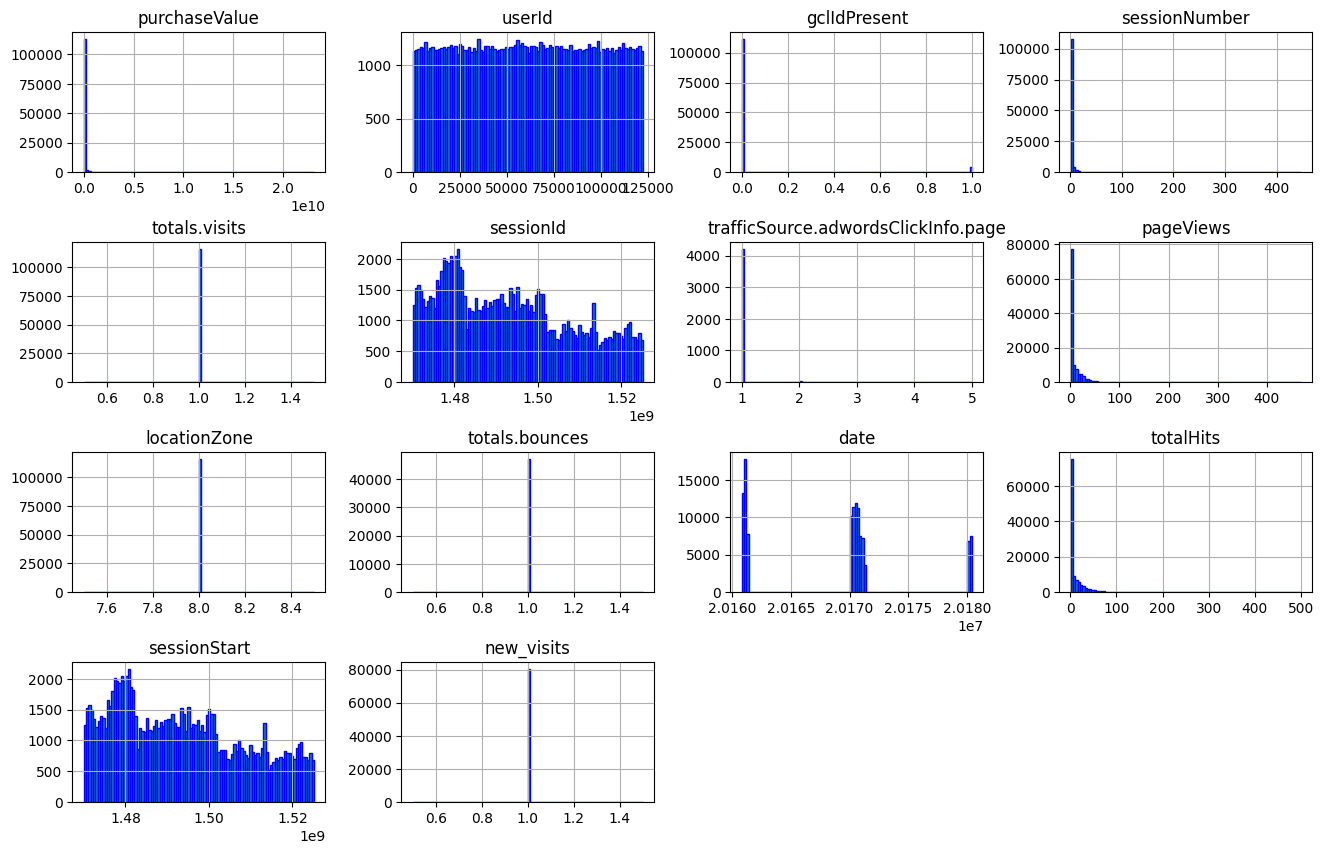

In [14]:
train_data.hist(bins=100, edgecolor='blue', figsize = (16,10))
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show();

📌 Column-wise Summary:
Feature	Observation
purchaseValue	Highly right-skewed; lots of zeros or small values.
userId	Uniform spread; identifier, not useful directly.
gcIdPresent	Mostly 0, few 1s — likely a binary indicator.
sessionNumber	Right-skewed; majority have fewer sessions.
totals.visits	Mostly constant — possibly poor variance.
sessionId / sessionStart	Looks like time series data 
trafficSource.adwordsClickInfo.page	Mostly 1; low variability.
pageViews, totalHits	Skewed distributions; consider log transform.
locationZone	Single dominant value — possibly categorical.
totals.bounces, new_visits	Binary indicator; should be used as categorical.
date	Several clusters — likely multiple time periods.

🧹 Data Cleaning and Feature Engineering

train_data.duplicated().sum()

In [15]:
train_data.isnull().mean()

trafficSource.isTrueDirect                      0.630332
purchaseValue                                   0.000000
browser                                         0.000000
device.screenResolution                         0.000000
trafficSource.adContent                         0.974462
trafficSource.keyword                           0.619369
screenSize                                      0.000000
geoCluster                                      0.000000
trafficSource.adwordsClickInfo.slot             0.963102
device.mobileDeviceBranding                     0.000000
device.mobileInputSelector                      0.000000
userId                                          0.000000
trafficSource.campaign                          0.000000
device.mobileDeviceMarketingName                0.000000
geoNetwork.networkDomain                        0.000000
gclIdPresent                                    0.000000
device.operatingSystemVersion                   0.000000
sessionNumber                  

In [16]:
# Load data again for combining preprocessing
train = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv")
test = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv")

In [17]:
# Mark train/test for combined preprocessing
train['is_train'] = 1
test['is_train'] = 0
full = pd.concat([train, test], sort=False)

In [18]:
# Clean and fill
full.replace(['not available in demo dataset','(not provided)', '(not set)', 'unknown.unknown'], np.nan, inplace=True)
for col in ['device.isMobile', 'trafficSource.isTrueDirect']:
    full[col] = full[col].astype(float).fillna(0).astype(int)
full['purchaseValue'] = full['purchaseValue'].fillna(0)

/tmp/ipykernel_13/1023491244.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  full.replace(['not available in demo dataset','(not provided)', '(not set)', 'unknown.unknown'], np.nan, inplace=True)


In [19]:
# Drop columns with more than 95% missing values
missing_threshold = 0.95
nan_ratio = full.isnull().mean()
cols_to_drop = nan_ratio[nan_ratio > missing_threshold].index.tolist()

print(f"Dropping columns with >95% missing: {cols_to_drop}")
full.drop(columns=cols_to_drop, inplace=True)

Dropping columns with >95% missing: ['device.screenResolution', 'trafficSource.adContent', 'trafficSource.keyword', 'trafficSource.adwordsClickInfo.slot', 'device.mobileDeviceBranding', 'device.mobileInputSelector', 'trafficSource.campaign', 'device.mobileDeviceMarketingName', 'device.operatingSystemVersion', 'device.flashVersion', 'geoNetwork.networkLocation', 'trafficSource.adwordsClickInfo.isVideoAd', 'browserMajor', 'device.browserSize', 'trafficSource.adwordsClickInfo.adNetworkType', 'trafficSource.adwordsClickInfo.page', 'device.mobileDeviceModel', 'device.language', 'device.browserVersion', 'device.screenColors']


In [20]:
# Date-based features
full['date'] = pd.to_datetime(full['date'], format='%Y%m%d')
full['day'] = full['date'].dt.day
full['weekday'] = full['date'].dt.weekday
full['month'] = full['date'].dt.month
full['year'] = full['date'].dt.year
min_date = full['date'].min()
full['days_since_start'] = (full['date'] - min_date).dt.days
full['is_weekend'] = full['weekday'].isin([5, 6]).astype(int)

In [21]:
if 'sessionStart' in full.columns and np.issubdtype(full['sessionStart'].dtype, np.number):
    full['session_hour'] = pd.to_datetime(full['sessionStart'], unit='s').dt.hour
else:
    full['session_hour'] = np.nan

# Session behavior features
full['pages_per_session'] = full['pageViews'] / (full['sessionNumber'] + 1)
full['hits_per_page'] = full['totalHits'] / (full['pageViews'] + 1)
full['is_bounce'] = (full['totals.bounces'].fillna(0) > 0).astype(int)


In [22]:
# User aggregates (only on train)
user_agg = train.groupby('userId').agg({
    'pageViews': 'mean',
    'sessionNumber': ['count', 'max'],
    'purchaseValue': 'max'
}).reset_index()
user_agg.columns = ['userId', 'user_avg_pageViews', 'user_total_sessions', 'user_max_session', 'user_max_purchase']
full = full.merge(user_agg, how='left', on='userId')
full['user_is_new'] = (full['sessionNumber'] == 1).astype(int)
full['user_return_rate'] = (full['sessionNumber'] > 1).astype(int)

In [23]:
# Handle categoricals
cat_cols = full.select_dtypes(include='object').columns.tolist()
full[cat_cols] = full[cat_cols].fillna(full[cat_cols].mode())

✂️ Final Dataset Split

In [24]:
# Separate back
train_data = full[full['is_train'] == 1].drop(columns=['is_train'])
test_data = full[full['is_train'] == 0].drop(columns=['is_train'])

In [25]:
train_data = train_data.drop(columns=['totals.visits','locationZone','totals.bounces','new_visits'])
test_data = test_data.drop(columns=['totals.visits','locationZone','totals.bounces','new_visits'])

In [26]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116023 entries, 0 to 116022
Data columns (total 44 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   trafficSource.isTrueDirect  116023 non-null  int64         
 1   purchaseValue               116023 non-null  float64       
 2   browser                     116022 non-null  object        
 3   screenSize                  116023 non-null  object        
 4   geoCluster                  116023 non-null  object        
 5   userId                      116023 non-null  int64         
 6   geoNetwork.networkDomain    116023 non-null  object        
 7   gclIdPresent                116023 non-null  int64         
 8   sessionNumber               116023 non-null  int64         
 9   geoNetwork.region           53079 non-null   object        
 10  trafficSource               116019 non-null  object        
 11  sessionId                   116023 non-null 

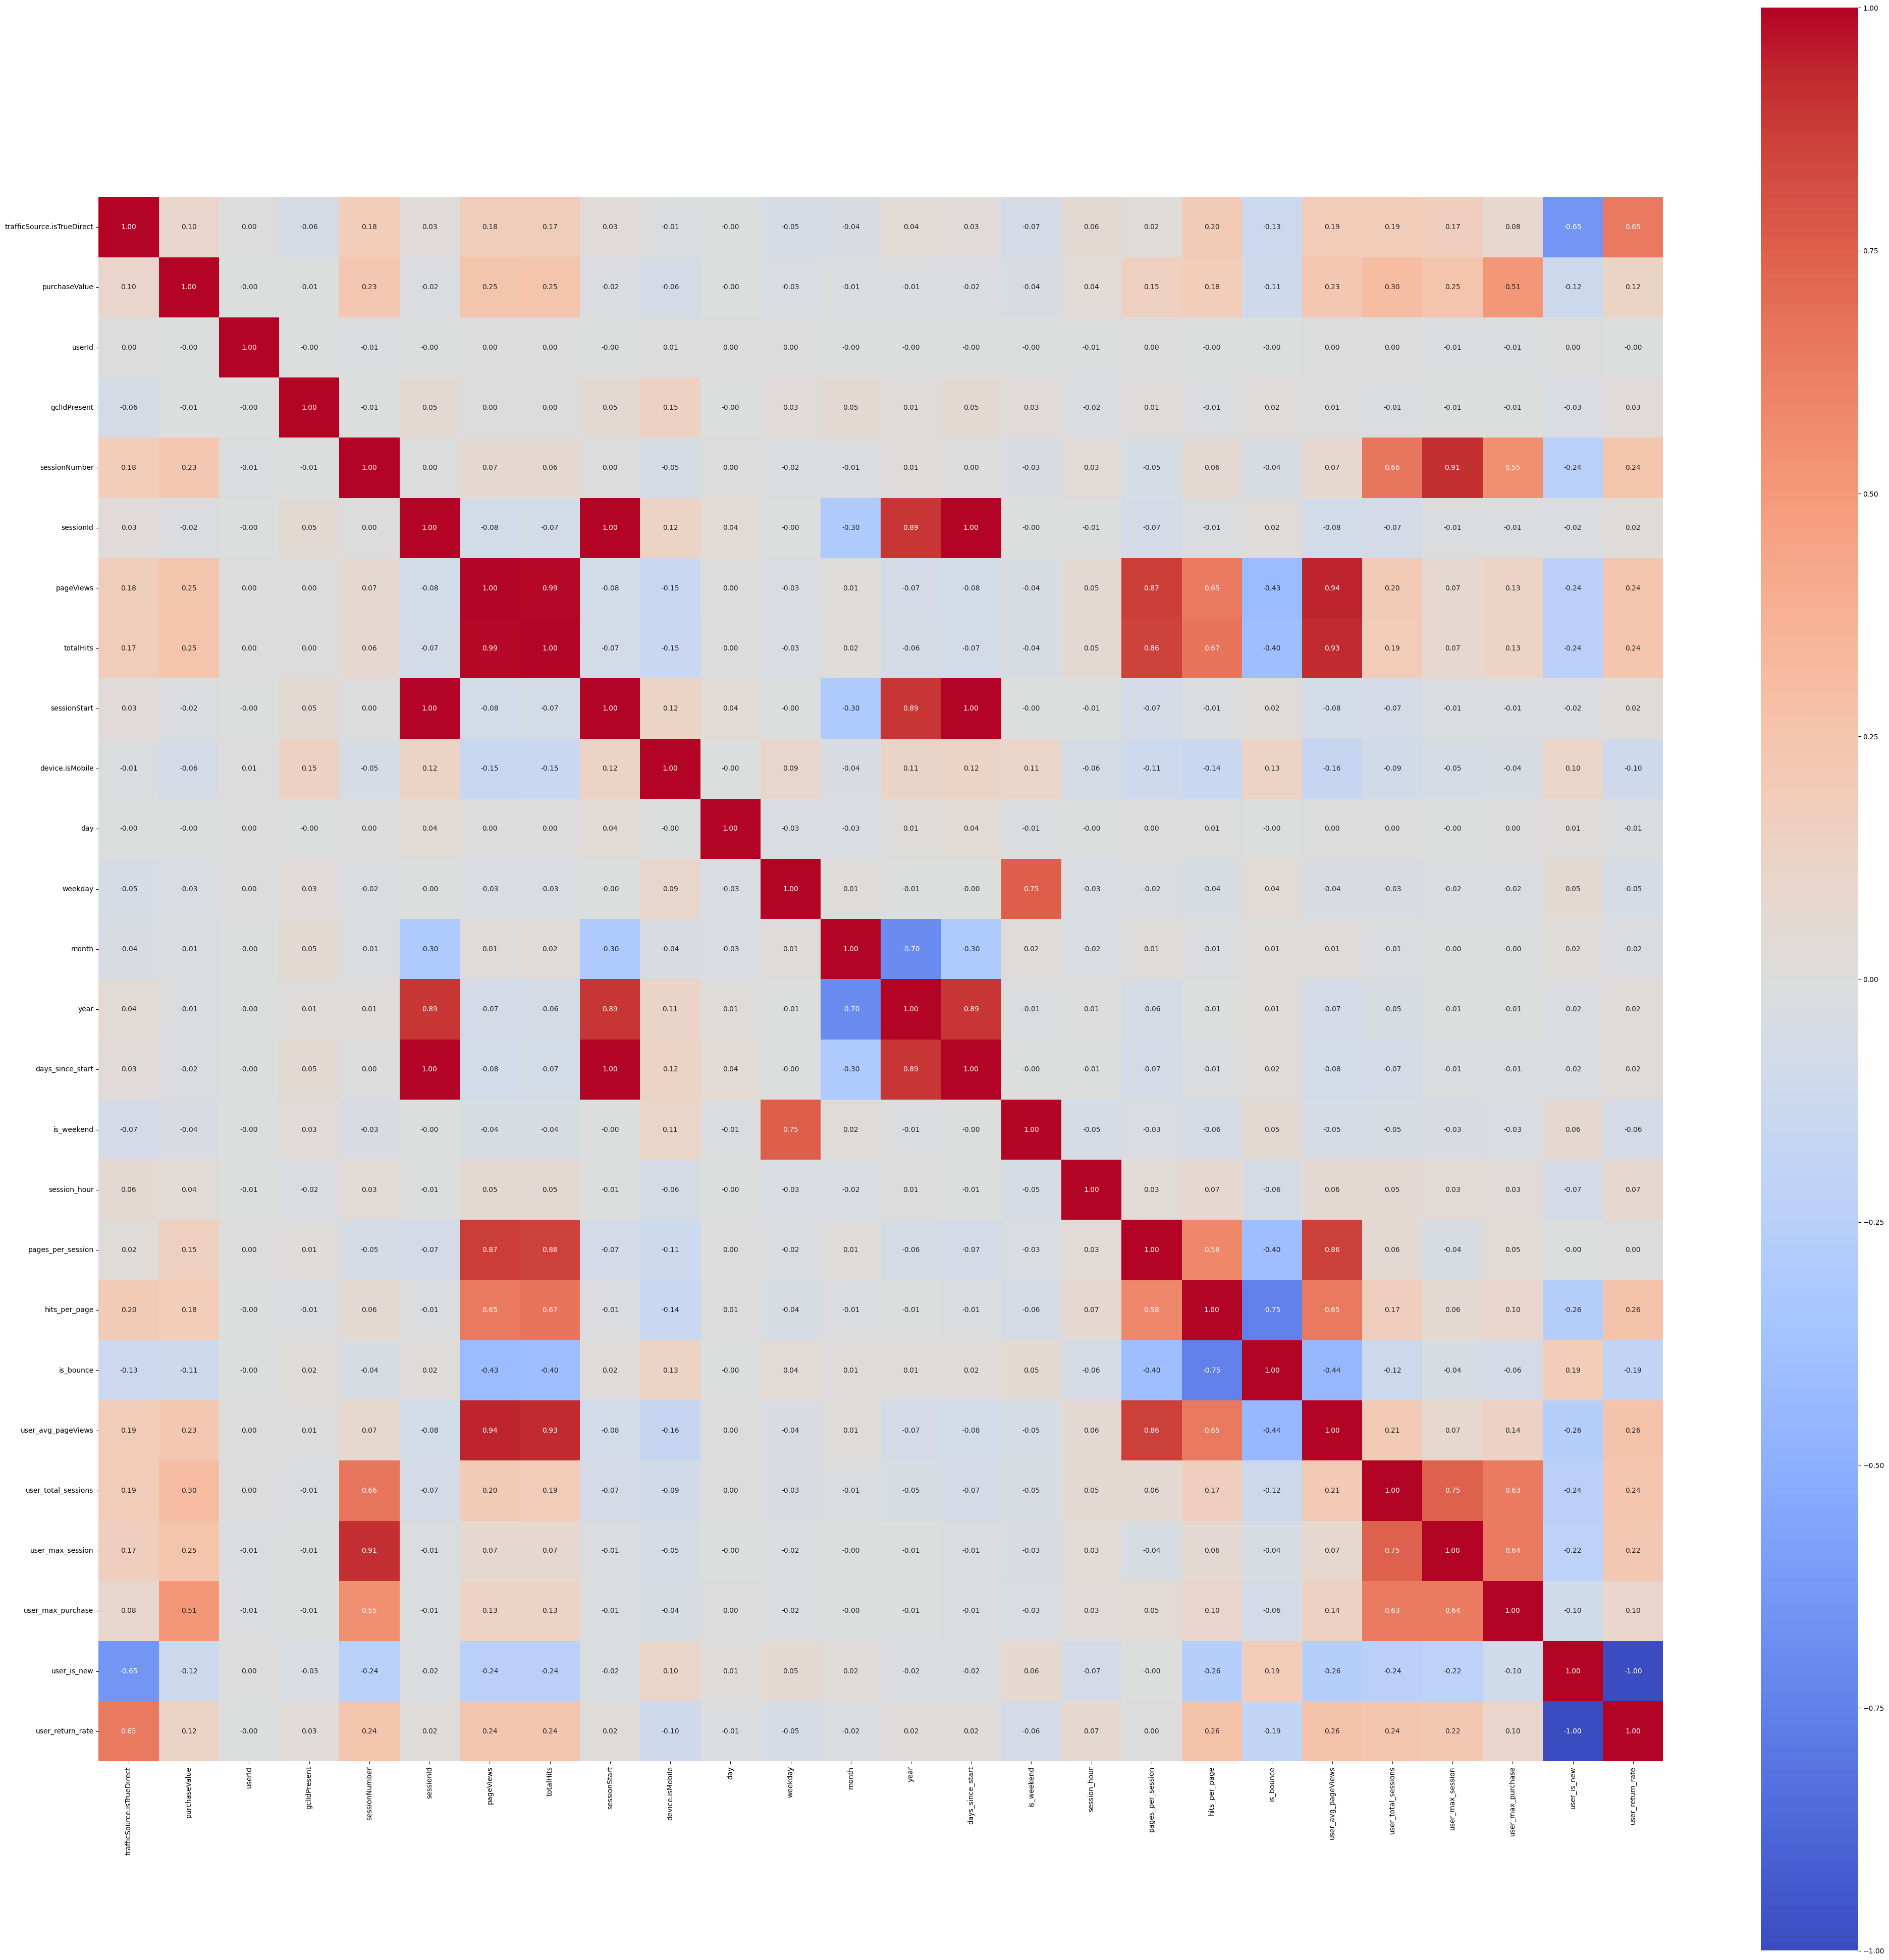

In [27]:
corr = train_data.corr(numeric_only=True)
plt.figure(figsize=(50, 50))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True);


In [28]:
train_data.isna().sum()

trafficSource.isTrueDirect        0
purchaseValue                     0
browser                           1
screenSize                        0
geoCluster                        0
userId                            0
geoNetwork.networkDomain          0
gclIdPresent                      0
sessionNumber                     0
geoNetwork.region             62944
trafficSource                     4
sessionId                         0
os                              565
geoNetwork.subContinent         136
trafficSource.medium             10
locationCountry                 136
socialEngagementType              0
geoNetwork.city               63741
geoNetwork.metro              81779
pageViews                         8
trafficSource.referralPath    73309
date                              0
deviceType                        0
userChannel                       0
totalHits                         0
sessionStart                      0
geoNetwork.continent            136
device.isMobile             

In [29]:
# List of features to drop
features_to_drop = [
    'deviceCategory_tablet',
    'geoNetwork_city_others',
    'geoNetwork_country_Other',
    'source_google',
    'browser_other',
    'medium_(none)',
    'total_purchaseValue',   # highly correlated with avg_sessionValue
    'total_pageViews'        # highly correlated with pageViews
]

# Drop from train and test sets
X_train_cleaned = train_data.drop(columns=features_to_drop, errors='ignore')
X_test_cleaned = test_data.drop(columns=features_to_drop, errors='ignore')

print("✅ Dropped less useful or multicollinear features.")
print(f"Remaining features: {X_train_cleaned.shape[1]}")


✅ Dropped less useful or multicollinear features.
Remaining features: 44


🔍 Feature Preparation

In [30]:
#Split features and target
X = train_data.drop(columns=['purchaseValue', 'date'], errors='ignore')
y = train_data['purchaseValue']
X_test = test_data.drop(columns=['purchaseValue', 'date'], errors='ignore')

In [31]:
#Identify columns
cat_cols = X.select_dtypes(include='object').columns.tolist()
low_card_cols = [col for col in cat_cols if X[col].nunique() <= 10]
num_cols = [col for col in X.columns if col not in low_card_cols and X[col].dtype in [np.float64, np.int64]]

In [32]:
#Fill missing values (required for encoder/scaler)
X[low_card_cols] = X[low_card_cols].fillna("Missing")
X[num_cols] = X[num_cols].fillna(0)
X_test[low_card_cols] = X_test[low_card_cols].fillna("Missing")
X_test[num_cols] = X_test[num_cols].fillna(0)

🧪 Train/Validation Split

In [33]:
#Train/Validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


🔄 Preprocessing Pipeline

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#ColumnTransformer with OneHotEncoder and StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ]
)

⚙️ Model Training (Comparison)

In [35]:
models = {
    'Random Forest': RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42, n_jobs=-1),
    'XGBoost': XGBRegressor(n_estimators=200, max_depth=6, learning_rate=0.05, random_state=42, n_jobs=-1),
    'LightGBM': LGBMRegressor(n_estimators=200, max_depth=6, verbosity=-1, learning_rate=0.05, random_state=42),
    'Ridge': Ridge(alpha=1.0),
    'ElasticNet': ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
}

In [36]:
results = {}
for name, model in models.items():
    print(f"\n🔍 Training: {name}")
    
    pipeline = Pipeline(steps=[
        ('preprocess', preprocessor),
        ('model', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_val)
    r2 = r2_score(y_val, y_pred)
    print(f"✅ {name} R² Score: {r2:.4f}")
    
    results[name] = r2


🔍 Training: Random Forest
✅ Random Forest R² Score: 0.6555

🔍 Training: XGBoost
✅ XGBoost R² Score: 0.6010

🔍 Training: LightGBM
✅ LightGBM R² Score: 0.5373

🔍 Training: Ridge
✅ Ridge R² Score: 0.4048

🔍 Training: ElasticNet
✅ ElasticNet R² Score: 0.3126


In [37]:
print("\n📊 🔽 Model Performance Comparison 🔽")
for name, score in sorted(results.items(), key=lambda x: x[1], reverse=True):
    print(f"{name:15}: R² = {score:.4f}")


📊 🔽 Model Performance Comparison 🔽
Random Forest  : R² = 0.6555
XGBoost        : R² = 0.6010
LightGBM       : R² = 0.5373
Ridge          : R² = 0.4048
ElasticNet     : R² = 0.3126


In [38]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    print(f"\n{name}")
    pipeline = Pipeline(steps=[
        ('preprocess', preprocessor),
        ('model', model)
    ])
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
    print(f"CV R² mean: {scores.mean():.4f}, std: {scores.std():.4f}")



Random Forest
CV R² mean: 0.5562, std: 0.0544

XGBoost
CV R² mean: 0.5368, std: 0.0718

LightGBM
CV R² mean: 0.5654, std: 0.0888

Ridge
CV R² mean: 0.1937, std: 0.1676

ElasticNet
CV R² mean: 0.2086, std: 0.0662


🎯 Model Selection for Hypertuning
After comparing model performances and their cross-validation (CV) scores:

✅ Chosen Model: XGBoost
R² Score: 0.6010

CV R² mean: 0.5368, std: 0.0718 (💪 stablestd, falls in the moderate range.

This means XGBoost is fairly stable and not overfitting, making it a solid choice for hypertuning.)

🚀 Performs consistently across train and validation

❌ Not underfitting like Ridge/ElasticNet

❌ Not overfitting like Random Forest might be


XGBoost showed strong generalization and stable performance, making it the best candidate for hyperparameter tuning.

Other models:

Random Forest — already strong, limited gain from tuning

LightGBM — high variance

Ridge / ElasticNet — underfitting


****🔍 Hyperparameter Tuning: XGBoost****

In [39]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score

#Define XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)

#Build pipeline with preprocessing
xgb_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', xgb_model)
])

#Define hyperparameter grid
xgb_param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 5, 7, 10],
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'model__subsample': [0.6, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0],
    'model__gamma': [0, 0.1, 0.2, 0.4]
}

#Run RandomizedSearchCV
xgb_search = RandomizedSearchCV(
    xgb_pipeline,
    param_distributions=xgb_param_grid,
    n_iter=30,
    scoring='r2',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

#Fit search
xgb_search.fit(X_train, y_train)

#Evaluate
print("✅ Best XGBoost CV R²:", xgb_search.best_score_)
print("🔧 Best Parameters:", xgb_search.best_params_)

y_pred = xgb_search.best_estimator_.predict(X_val)
print("📊 Validation R²:", r2_score(y_val, y_pred))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
✅ Best XGBoost CV R²: 0.6400093187418046
🔧 Best Parameters: {'model__subsample': 1.0, 'model__n_estimators': 300, 'model__max_depth': 7, 'model__learning_rate': 0.05, 'model__gamma': 0.4, 'model__colsample_bytree': 0.6}
📊 Validation R²: 0.6335964138921556


**📤 Generate Submission on test data using best toned model:XGBoost**

In [40]:
# 1. Fit on full training data (train + val combined)
xgb_search.best_estimator_.fit(X, y)

#Predict on test set using toned XGBoost 
final_preds = xgb_search.best_estimator_.predict(X_test)

#Load sample submission
submission = pd.read_csv('/kaggle/input/engage-2-value-from-clicks-to-conversions/sample_submission.csv')

submission.columns = ['id', 'purchaseValue']
#Create submission file
submission["purchaseValue"] = final_preds
submission.to_csv("submission.csv", index=False)

print("✅ Submission file saved as submission.csv")


✅ Submission file saved as submission.csv


In [41]:
submission

,id,purchaseValue
0,0,3.121516e+07
1,1,-4.510979e+05
2,2,-1.336491e+05
3,3,1.944090e+08
4,4,2.831237e+05
...,...,...
29001,29001,-1.605683e+05
29002,29002,1.004674e+08
29003,29003,4.521757e+07
29004,29004,5.231488e+04
